In [1]:
# Plot the 12-month percentage growth rates in real GDP and in total real government purchases from 1948 to 2015. 
# Calculate these growth rates from quarterly data.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
rgdp = pd.read_csv("C:\\Users\\Ian\\Desktop\\Macro 22-23\\RealGDP.csv")
govexp = pd.read_csv("C:\\Users\\Ian\\Desktop\\Macro 22-23\\RealGovExpInv.csv")
govexp

,DATE,GCEC1
0,1/1/1947,524.026
1,4/1/1947,523.583
2,7/1/1947,523.477
3,10/1/1947,519.236
4,1/1/1948,526.970
...,...,...
297,4/1/2021,3373.765
298,7/1/2021,3381.574
299,10/1/2021,3359.010
300,1/1/2022,3334.306


In [3]:
data = pd.concat([rgdp, govexp], axis =1)
data = data.iloc[:, 1:4]
data.columns = ["RGDP", "DATE", "GEXP"]
data["DATE"] = pd.to_datetime(data["DATE"], format = "%m/%d/%Y")
type(data["DATE"])
data.index = data["DATE"]


In [4]:
data1 = data.groupby([data.index.year]).mean()
data1

,RGDP,GEXP
DATE,,
1947,2119.95925,522.58050
1948,2107.99900,551.73000
1949,2291.11050,610.99725
1950,2475.44875,613.46275
1951,2576.65800,838.81950
...,...,...
2018,NaN,3208.82600
2019,NaN,3279.51500
2020,NaN,3360.18050


In [5]:
data1["rRGDP"] = data1["RGDP"].pct_change()
data1["rGEXP"] = data1["GEXP"].pct_change()
data1

,RGDP,GEXP,rRGDP,rGEXP
DATE,,,,
1947,2119.95925,522.58050,NaN,NaN
1948,2107.99900,551.73000,-0.005642,0.055780
1949,2291.11050,610.99725,0.086865,0.107421
1950,2475.44875,613.46275,0.080458,0.004035
1951,2576.65800,838.81950,0.040885,0.367352
...,...,...,...,...
2018,NaN,3208.82600,0.000000,0.013787
2019,NaN,3279.51500,0.000000,0.022030
2020,NaN,3360.18050,0.000000,0.024597


<AxesSubplot:xlabel='DATE'>

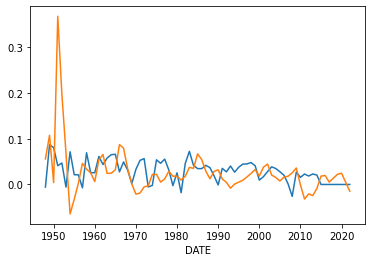

In [7]:
data1["rRGDP"].plot()
data1["rGEXP"].plot()

In [12]:
data1.corr()

,RGDP,GEXP,rRGDP,rGEXP
RGDP,1.000000,0.982294,-0.277566,-0.302341
GEXP,0.982294,1.000000,-0.438915,-0.318075
rRGDP,-0.277566,-0.438915,1.000000,0.127694
rGEXP,-0.302341,-0.318075,0.127694,1.000000


a) There appears to be a small positive correlation between real gdp growth rate and the growth rate of govenment expenditures of (0.127694). There also appears to be a stronger negative correlation between government expendeture and real GDP growth rates. This would suggest that lower growth rates are correlated with greated govenment expendiure, and higher govenment expenditure is correlated with greater growth rates.

b) This would suggest that the government is predisposed to spend when real GDP growth is poor and that this expenditure has a possitivve effect on the growth rate of real gdp.

c) Total Govenrment Expenditures would be greater that Total Government consumption and Gross Investment because total expenditures would include expenditures like servicing debts.